In [1]:
from qutip import *
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def oracle(x,dim):
    array = [ ]
    if x>dim:
        return("dim error: dim should greater or equal to x")
    for i in range(dim):
        if i+1==x:
            array.append([1])
        else:
            array.append([0])
    return(array)

In [3]:
def diffusor(s):
    #the input state should be ket
    sm = [ ]
    dim = s.dims[0][0]
    for i in range(dim):
        numi = s[i][0][0]
        sm.append([ ])
        for j in range(dim):
            numj = s[j][0][0]
            sm[i].append(2*np.conj(numi)*numj)
            if i == j:
                sm[i][j] = sm[i][j]-1
    return(sm)


In [4]:
R1 = [ ]
dim_R1 = 32
N1 = 1/np.sqrt(32)


for i in range(dim_R1):
    R1.append(Qobj(oracle(i+1,dim_R1)))

R1

[Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [

In [5]:
R2 = [ ]
dim_R2 = 16
N2 = 1/np.sqrt(16)


for i in range(dim_R2):
    R2.append(Qobj(oracle(i+1,dim_R2)))

R2

[Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], sha

In [6]:
phi = 0.25
z = complex(0,phi*np.pi)
phase = np.exp(z)

In [7]:
s=0
for i in range(dim_R2):
    s = s + R2[i]
s = N2 * s #the grover search state which is used to construct the diffusor
s

Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
Qobj data =
[[0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]]

In [8]:
#In the second register
# s=0
# for i in range(dim_R2):
#     if i > 0:
#         s = s + R2[i]
#     else:
#         s = s + phase*R2[i]
# s = N2 * s #the grover search state which is used to construct the diffusor
# s

In [9]:
target_set = [[0,0],[1,0],[2,0],[3,0],[4,3],[5,1],[6,12],[7,0],[8,4],[9,1],[10,1],[11,0],[12,5],[13,0],[14,2],[15,5],[16,3],[17,0]]

In [11]:
#the searching state
R12 = 0
for i in range(16):
    for j in range(32):
        if [i,j] == target_set[i]:
            R12 = R12 + phase*tensor(R1[j],R2[i])
        else:
            R12 = R12 + tensor(R1[j],R2[i])
R12 = N1*N2*R12
R12

Quantum object: dims = [[32, 16], [1, 1]], shape = (512, 1), type = ket
Qobj data =
[[0.03125   +0.03125j]
 [0.03125   +0.03125j]
 [0.03125   +0.03125j]
 [0.03125   +0.03125j]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.03125   +0.03125j]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.03125   +0.03125j]
 [0.04419417+0.j     ]
 [0.03125   +0.03125j]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.03125   +0.03125j]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.03125   +0.03125j]
 [0.03125   +0.03125j]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j     ]
 [0.04419417+0.j   

In [12]:
uw = [ ]
for i in range(16):
    uw.append([ ])
    for j in range(16):
        if i==j:
            if j==0:     #do the inversion on the \ket{0} state in the second register
                uw[i].append(-1)
            else:
                uw[i].append(1)
        else:
            uw[i].append(0)
u_w = tensor(qeye(32),Qobj(uw))

In [13]:
us = Qobj(diffusor(s))
u_s= tensor(qeye(32),us)
us

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-0.875  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125
   0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125 -0.875  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125
   0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125 -0.875  0.125  0.125  0.125  0.125  0.125  0.125  0.125
   0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125 -0.875  0.125  0.125  0.125  0.125  0.125  0.125
   0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125 -0.875  0.125  0.125  0.125  0.125  0.125
   0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125 -0.875  0.125  0.125  0.125  0.125
   0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125 -0.875  0.125  0.125  0.125
   0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125 -0.875  0.125  0.125
   0.125  0.125

In [14]:
u_w

Quantum object: dims = [[32, 16], [32, 16]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[-1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]

In [15]:
u_s

Quantum object: dims = [[32, 16], [32, 16]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[-0.875  0.125  0.125 ...  0.     0.     0.   ]
 [ 0.125 -0.875  0.125 ...  0.     0.     0.   ]
 [ 0.125  0.125 -0.875 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ... -0.875  0.125  0.125]
 [ 0.     0.     0.    ...  0.125 -0.875  0.125]
 [ 0.     0.     0.    ...  0.125  0.125 -0.875]]

In [16]:
ss= u_s * u_w * R12
ss

Quantum object: dims = [[32, 16], [1, 1]], shape = (512, 1), type = ket
Qobj data =
[[0.1004997 +0.05078125j]
 [0.0379997 -0.01171875j]
 [0.0379997 -0.01171875j]
 [0.0379997 -0.01171875j]
 [0.02505552+0.01953125j]
 [0.02505552+0.01953125j]
 [0.02505552+0.01953125j]
 [0.0379997 -0.01171875j]
 [0.02505552+0.01953125j]
 [0.02505552+0.01953125j]
 [0.02505552+0.01953125j]
 [0.0379997 -0.01171875j]
 [0.02505552+0.01953125j]
 [0.0379997 -0.01171875j]
 [0.02505552+0.01953125j]
 [0.02505552+0.01953125j]
 [0.11667991+0.01171875j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.04123574-0.01953125j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.04123574-0.01953125j]
 [0.04123574-0.01953125j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.02829157+0.01171875j]
 [0.11991596+0.00390625j]
 [0.03152761+0.00390625j]
 [0.03152761+0.00390625j]
 [0.03

In [17]:
dummy=2
# while ss[0][0][0]< 0.12:
#     ss= u_s * u_w * ss
#     dummy+=1
# ss

for i in range(dummy):
    ss = u_s * u_w *ss

#// when dummy = 3, the saperation between p1 and p2 reachs maximum

In [18]:
p=0
for i in range(512):
    p+= ss[i][0][0]* np.conj(ss[i][0][0])
p

(0.9999999999999999+0j)

In [19]:
p1 = ss[0][0][0]* np.conj(ss[0][0][0])
p2 = ss[1][0][0]* np.conj(ss[1][0][0])
p3 = ss[32][0][0]* np.conj(ss[32][0][0])
p3 = ss[64][0][0]* np.conj(ss[64][0][0])
p1

(0.025789546101699576+0j)

In [20]:
p2

(0.000685812360633896+0j)

D:\useful tools\anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


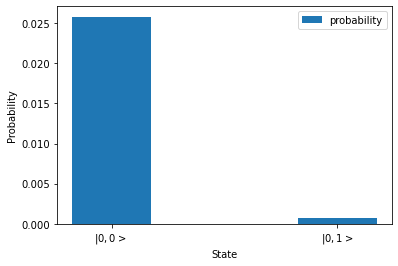

In [21]:
labels = ['$|0,0>$ ', '$|0,1>$' ]
width=0.35
prob = [p1,p2]

fig, ax=plt.subplots()

ax.bar(labels,prob,width,label='probability')
ax.set_ylabel('Probability')
ax.set_xlabel('State')
ax.legend()

plt.show()